<a href="https://colab.research.google.com/github/Tieck-IT/Study/blob/main/tf_keras/%5BAutoEncoder%5Dimage_search_by_ConvAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영상 데이터 검색 by AutoEncoder

# 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

In [1]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
!ls -al  

--2022-01-27 04:38:20--  https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2022-01-27 04:38:20--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   246MB/s    in 0.2s    

2022-01-27 04:38:24 (246 MB/s) 

In [2]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

# 모델 학습

In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [5]:
BATCH_SIZE = 64



train_data_generator = ImageDataGenerator(
      rescale = 1/255.0,
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale = 1/255.0,
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

train_images = []
for i in range(len(train_data_generator)):
    batch_x, batch_y = next(train_data_generator)
    train_images.append(batch_x)

train_images = np.vstack(train_images)
print(train_images.shape)


test_images = []
for i in range(len(test_data_generator)):
    batch_x, batch_y = next(train_data_generator)
    test_images.append(batch_x)

test_images = np.vstack(test_images)
print(test_images.shape)


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
(1531, 224, 224, 3)
(448, 224, 224, 3)


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

input = Input(shape=(224, 224, 3))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)

x = Dense(4, name="bottle_neck")(x)

# Decoder
x = Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
output = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

model = Model(input, output)
model.compile(optimizer="Adam", loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0     

Epoch 1/300
22/22 [==============================] - 21s 390ms/step - loss: 0.0535 - val_loss: 0.0623
Epoch 2/300
22/22 [==============================] - 7s 324ms/step - loss: 0.0268 - val_loss: 0.0658
Epoch 3/300
22/22 [==============================] - 7s 329ms/step - loss: 0.0227 - val_loss: 0.0657
Epoch 4/300
22/22 [==============================] - 7s 318ms/step - loss: 0.0210 - val_loss: 0.0653
Epoch 5/300
22/22 [==============================] - 7s 301ms/step - loss: 0.0202 - val_loss: 0.0654
Epoch 6/300
22/22 [==============================] - 6s 295ms/step - loss: 0.0194 - val_loss: 0.0648
Epoch 7/300
22/22 [==============================] - 6s 296ms/step - loss: 0.0190 - val_loss: 0.0652
Epoch 8/300
22/22 [==============================] - 7s 296ms/step - loss: 0.0185 - val_loss: 0.0616
Epoch 9/300
22/22 [==============================] - 7s 300ms/step - loss: 0.0180 - val_loss: 0.0622
Epoch 10/300
22/22 [==============================] - 6s 295ms/step - loss: 0.0180 - val_l

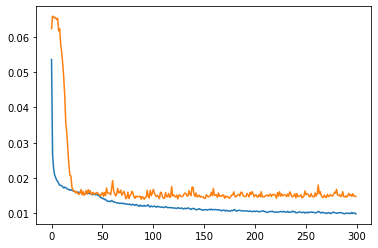

In [7]:

history = model.fit(train_images, train_images, epochs=300, batch_size=BATCH_SIZE, validation_split=0.1)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



- 데이터가 부족해서 더 이상 손실이 감소하지 않는다.
    - 1919개의 데이터 사용

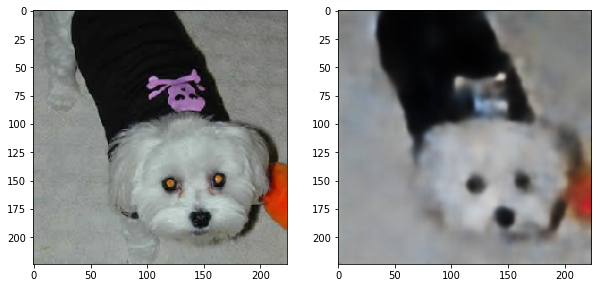

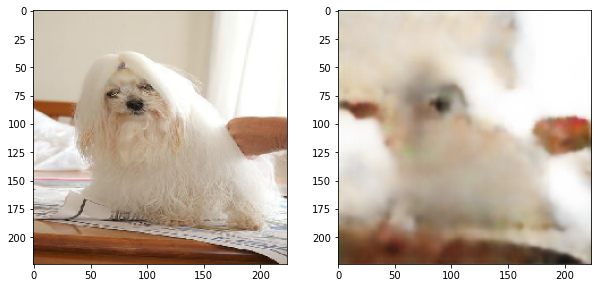

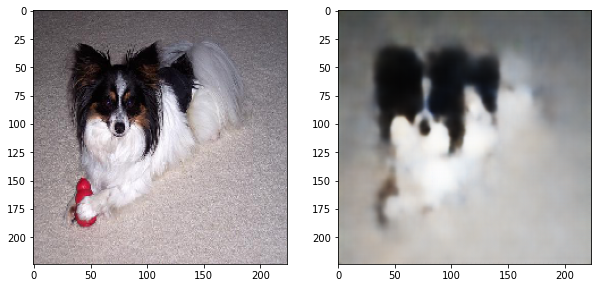

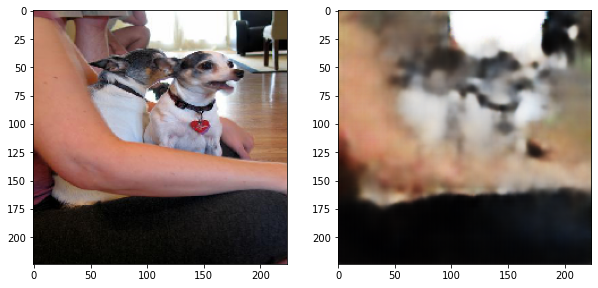

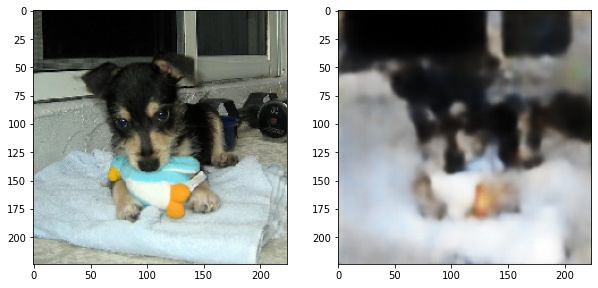

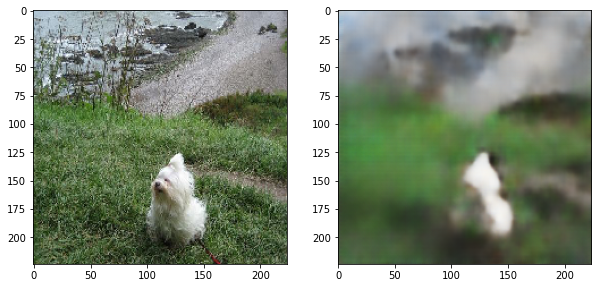

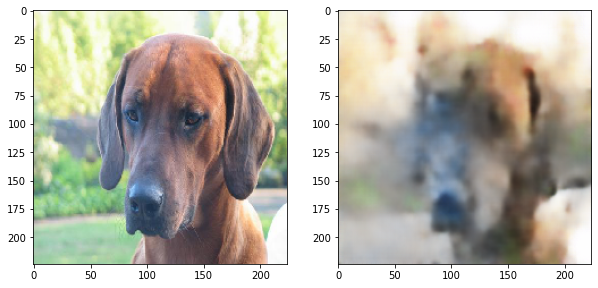

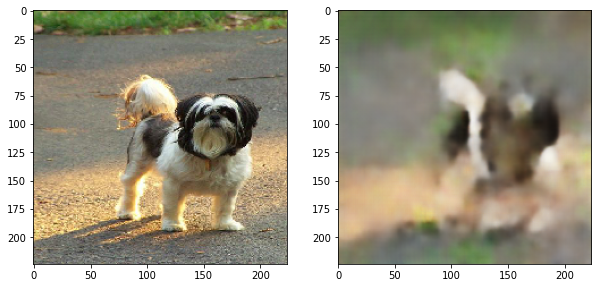

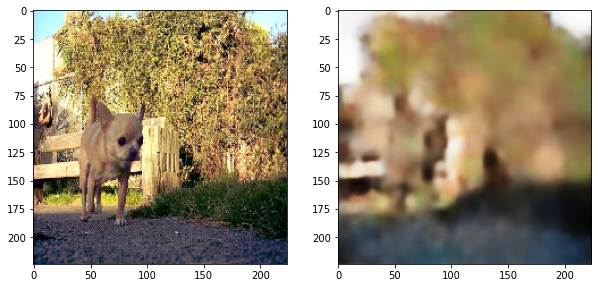

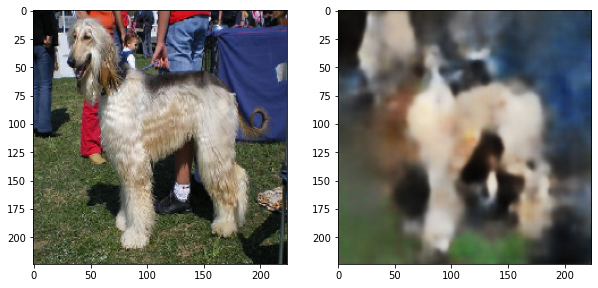

In [8]:
reconstructed = model.predict(train_images[:16])
for i in range(5):
    plt.figure(figsize=(10,5))  
    plt.subplot(121)
    plt.imshow(train_images[i])
    plt.subplot(122)
    plt.imshow(reconstructed[i])
    plt.show()

reconstructed = model.predict(test_images[:16])
for i in range(5):
    plt.figure(figsize=(10,5))  
    plt.subplot(121)
    plt.imshow(test_images[i])
    plt.subplot(122)
    plt.imshow(reconstructed[i])
    plt.show()



# 인코딩

- 오토 인코더의 encoder와 decoder가 만나는 layer에 bottle_neck이라는 이름을 붙임. (병목현상)
- 오토인코더에서 real world에서 latent world로 imbedding된 codes를 출력
    1. encoder에 이미지를 넣고 feature map 추출
    2. 추출된 feature map과 검색 대상 데이터의 feature map 사이의 유클리드 거리로 계산
    3. 거리가 작은 순으로 10개의 이미지 출력

In [10]:
encoder = Model(inputs=model.input, outputs=model.get_layer("bottle_neck").output)

images = []
codes = []
for i in range(len(train_data_generator)):
    batch_x, batch_y = next(train_data_generator)
    encoded = encoder(batch_x)
    images.extend(batch_x)
    codes.extend(encoded)

images = np.array(images)
codes = np.array(codes)

print(images.shape)
print(codes.shape)

(1531, 224, 224, 3)
(1531, 7, 7, 4)


In [11]:
codes = codes.reshape((-1, 7*7*4))

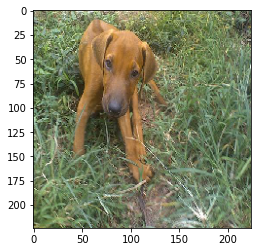

In [37]:
batch_x, batch_y = next(test_data_generator)

I = 1
target_image = batch_x[I]
target_code = encoder.predict(batch_x).reshape((-1, 7*7*4))[I]

plt.imshow(target_image)
plt.show()

# 가까운 영상 찾기

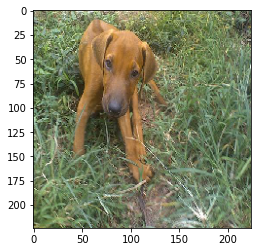

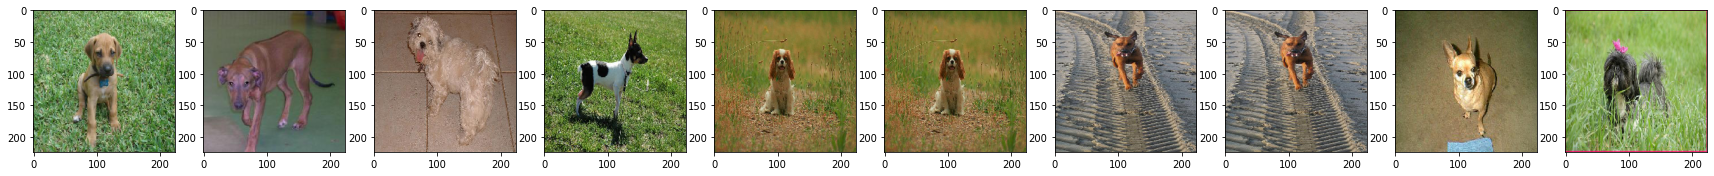

In [38]:
from scipy.spatial import distance

distances = [distance.euclidean(target_code, code) for code in codes]
similar_index = np.argsort(distances)

plt.imshow(target_image)
plt.show()
n = 10
plt.figure(figsize=(30,3))
for i in range(1,n+1):
    plt.subplot(1,n,i)
    plt.imshow(images[similar_index[i]])
plt.show()
